### Задача 1

Из первого уравнения выразим:
$$I_s(g(2\rho_s-1)-1)=0\\
g(2\rho_s-1)-1=0\\
\rho_s=\frac{\frac{1}{g}+1}{2}$$

Из третьего уравнения:
$$\eta_w(J_{thr}-n_s-2F(\rho_s,n_s))=0 \Leftrightarrow n_s=\frac{J_{thr}}{1+2B(1-\rho_s)}$$

Из второго уравнения:
$$\eta_d(F(\rho_s,n_s)-\rho_s-I_s(2\rho_s-1))=0 \Leftrightarrow I_s=\frac{Bn_s(1-\rho_s)-\rho_s}{2\rho_s-1}$$

Подставляя полученные выше результаты для уравнений (1) и (3) в (2) и упрощая, получаем:

$$I_s=\frac{J_{thr}B(1-\rho_s)}{(2\rho_s-1)(2B(1-\rho_s)+1)}-\frac{\rho_s}{2\rho_s-1}$$

Обращаясь к условию $Is>0$, можем использовать это выражение для расчета порогового параметра накачки и вернуться к расчету нормированного числа носителей заряда в смачивающем слое. Так получены следующие численные значения:

$$\rho_s=0.9273504273504274$$
$$n_s=0.01823529411764707222$$
$$J_{thr}=1.87293614881850187$$




### Задачи 2-3

Импорт необходимых библиотек

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

Определение системы

In [2]:
def odes(t,y,B):
    I, rho, n = y
    F=B*n*(1-rho)
    dydt=[I*(g*(2*rho-1)-1),
          eta_d*(F-rho-I*(2*rho-1)),
          eta_w*(J-n-2*F)]
    return dydt

Параметры

In [3]:
g=1.17
J=4*1.87293614881850187
B=np.array([700,350])
tau_d=0.9*10**(-9)
tau_p=20*10**(-12)
tau_w=1*10**(-9)
eta_d=tau_p/tau_d
eta_w=tau_p/tau_w

Начальные значения и вектор времени

In [4]:
y0=(3,0,2)
t=np.linspace(0,500,5000)

Вызов солвера

In [5]:
solution_ivp1=solve_ivp(odes,t_span=[0,max(t)], t_eval=t, y0=y0, args=[B[0]], rtol=1e-8)
solution_ivp2=solve_ivp(odes,t_span=[0,max(t)], t_eval=t, y0=y0, args=[B[1]], rtol=1e-8)

Обработка результата и переход к действительному времени

In [6]:
It_1=solution_ivp1.y[0]
It_2=solution_ivp2.y[0]
t_ns=solution_ivp1.t*tau_p*10**9

График

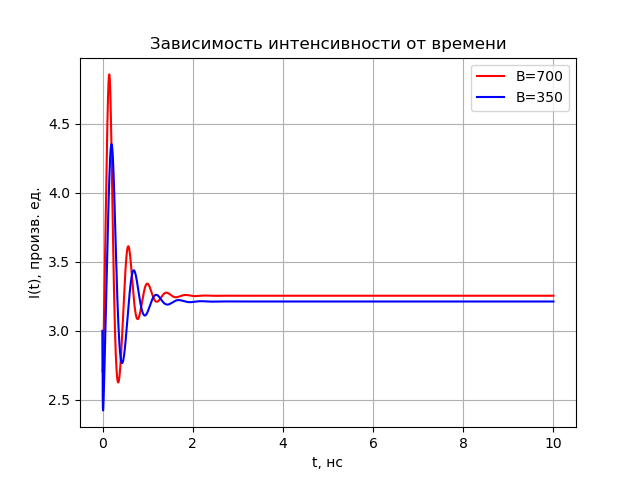

In [7]:
%matplotlib widget
plt.figure(1)
plt.title('Зависимость интенсивности от времени')
plt.xlabel('t, нс')
plt.ylabel('I(t), произв. ед.') 
plt.plot(t_ns, It_1, color='red', label='B=700')
plt.plot(t_ns, It_2, color='blue', label='B=350')
plt.grid()
plt.legend(loc='best')
plt.savefig('graph1FINAL.png',dpi=600)
plt.show()

Определение частот релаксационных колебаний по графику
$$f_{RO_{700}}\approx\frac{1}{1.414-0.996}\approx2.39\text{ ГГц}$$
$$f_{RO_{350}}\approx\frac{1}{1.676-1.183}\approx2.03\text{ ГГц}$$

Так, уменьшение параметра B в два раза демонстрирует снижение частоты релаксационных колебаний на величину около 15%.